# Usage of the "brenda" module for obtaining molecules from the BRENDA database

First create a molecule object that holds all the data.

In [1]:
import brenda

# other valid values for typeof are 'product', 'substrates', 'products'
mol_obj = brenda.BrendaNaturalMols(typeof='substrate') 

type(mol_obj)

brenda.BrendaNaturalMols

Get a list of all unique molecules from all EC numbers

In [2]:
molecules = mol_obj.names()

molecules[:10]

["(1's)-(+)-abscisate",
 "(1's)-averantin",
 "(1's)-averantin +[reduced nadph-hemoprotein reductase]",
 '(1,3-beta-d-glucosyl)n',
 '(1,3-beta-d-glucosyl)n-1',
 '(1,4-alpha-d-glucosyl)n',
 '(1,4-beta-d-glucosyl)n',
 '(1-4)-beta-d-glucosyl-d-mannobiose',
 '(1-4)-beta-d-glucosyl-d-mannose',
 '(1-hydroxycyclohexan-1-yl)acetyl-coa']

Get a list of all EC numbers in the dataset

In [3]:
ec_nums = mol_obj.ec()

ec_nums[:10]

['1.1.1.1',
 '1.1.1.10',
 '1.1.1.100',
 '1.1.1.101',
 '1.1.1.102',
 '1.1.1.103',
 '1.1.1.104',
 '1.1.1.105',
 '1.1.1.106',
 '1.1.1.107']

Get a dictionary with EC number keys holding lists of molecule names

In [4]:
mol_data = mol_obj.data_dict()

print(list(mol_data.keys())[:10])

print(mol_data['1.1.3.10'])


['1.1.1.1', '1.1.1.10', '1.1.1.100', '1.1.1.101', '1.1.1.102', '1.1.1.103', '1.1.1.104', '1.1.1.105', '1.1.1.106', '1.1.1.107']
['alpha-d-glucose', 'galactose', 'glucose', 'sorbose', 'xylose']


Get a data frame holding the EC number and substrate name data

In [5]:
mol_data = mol_obj.data_frame()

mol_data.head()

,ec_number,molecule
0,1.1.1.1,1-butanol
1,1.1.1.1,2-dehydro-3-deoxy-d-gluconate
2,1.1.1.1,4-deoxy-l-erythro-5-hexoseulose
3,1.1.1.1,a primary alcohol
4,1.1.1.1,acetaldehyde


# Usage of the "cheminfo" module for working with the molecules

First create a molecule object that holds all the data. Conversion from names to SMILES occurs automatically on creation of the object.

The cheminfo module is dependent on the following cheminformatics packages:

cirpy

pubchempy

rdkit

### First let's look at name to SMILE conversion

In [6]:
import cheminfo

mols = ['(S)-Lactate', 'Glycolate', 'Tryptophane', 'ATP', 'ADP', 'AMP']

chem_obj = cheminfo.NameToSmile(names=mols, retest_none=False)

type(chem_obj)

cheminfo.NameToSmile

Get a list of molecule names

In [7]:
molecules = chem_obj.names()

molecules[:10]

['lactate', 'glycolate', 'tryptophane', 'atp', 'adp', 'amp']

Get a list of all the smiles

In [8]:
smiles = chem_obj.smiles()

smiles[:10]

['CC(C(=O)O)O',
 'C(C(=O)O)O',
 'C1=CC=C2C(=C1)C(=CN2)CC(C(=O)O)N',
 'C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O)O',
 'C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)OP(=O)(O)O)O)O',
 'C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)O)O)O']

Get a dictionary of all data with metabolite names as keys and smiles as values

In [9]:
smile_data = chem_obj.data_dict()

print(list(smile_data.keys())[:10])
print('\n')
print(smile_data['lactate'])

['lactate', 'glycolate', 'tryptophane', 'atp', 'adp', 'amp']


CC(C(=O)O)O


Get a data frame with the molecule names and smiles data

In [10]:
smile_data = chem_obj.data_frame()

smile_data.head()

,molecule,smile
0,lactate,CC(C(=O)O)O
1,glycolate,C(C(=O)O)O
2,tryptophane,C1=CC=C2C(=C1)C(=CN2)CC(C(=O)O)N
3,atp,C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)OP(...
4,adp,C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)OP(...


**Note**

Each of the four methods names(), smiles(), data_dict(), and data_frame() take the optional argument "exclude_none". By default this is set to False and all molecule names for which no SMILE could be obtained are excluded. If set to True, these will be included in the output.

### Now let's look at getting interesting data out of the SMILES

First create a data object using molecule names and smiles as input.

In [11]:
data_obj = cheminfo.SmileToData(names=chem_obj.names(),
                                smiles=chem_obj.smiles(), 
                                descriptor='morgan3', 
                                metric='tanimoto')

type(data_obj)

cheminfo.SmileToData

Several different alortithms for calculating descriptors are available. A list of the available ones can easily be obtained.

In [12]:
data_obj.valid_descriptors()

['maccs', 'morgan3', 'morgan5', 'rdkit']

Additionally several different metrics for comparing the molecules are available. A list of the available ones can easily be obtained.

In [13]:
data_obj.valid_metrics()

['asymmetric',
 'braunblanquet',
 'cosine',
 'dice',
 'kulczynski',
 'mcconnaughey',
 'rogotgoldberg',
 'russel',
 'sokal',
 'tanimoto']

#### Obtaining basic properties for the molecules

Get a list of the molecule names 

In [14]:
names = data_obj.names()

names[:10]

['lactate', 'glycolate', 'tryptophane', 'atp', 'adp', 'amp']

Get a list of the molecule smiles

In [15]:
smiles = data_obj.smiles()

smiles[:10]

['CC(C(=O)O)O',
 'C(C(=O)O)O',
 'C1=CC=C2C(=C1)C(=CN2)CC(C(=O)O)N',
 'C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O)O',
 'C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)OP(=O)(O)O)O)O',
 'C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)O)O)O']

Get a list of the molecule objects obtained from the smiles

[<rdkit.Chem.rdchem.Mol object at 0x7f34634210d0>, <rdkit.Chem.rdchem.Mol object at 0x7f3463421f30>, <rdkit.Chem.rdchem.Mol object at 0x7f3463421f80>, <rdkit.Chem.rdchem.Mol object at 0x7f34633ae030>, <rdkit.Chem.rdchem.Mol object at 0x7f34633ae080>, <rdkit.Chem.rdchem.Mol object at 0x7f34633ae0d0>]


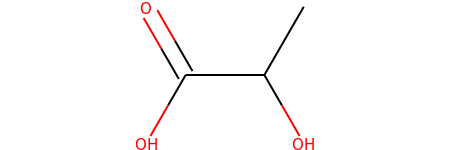

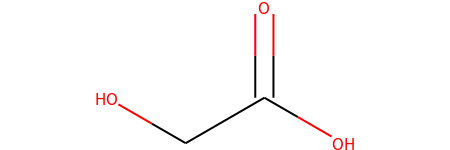

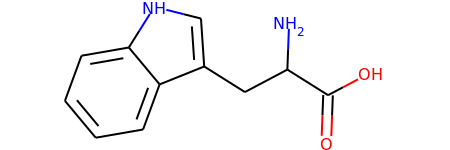

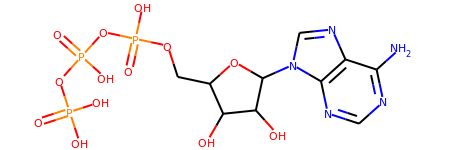

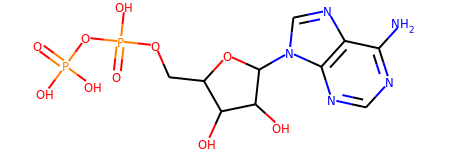

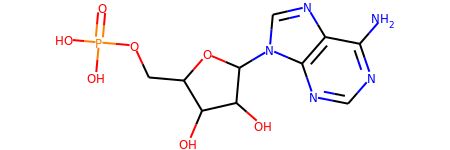

In [16]:
mols = data_obj.molecules()

print(mols[:10])

for m in mols[:10]:
    display(m)

Get a list of fingerprint objects for each of the molecules

In [17]:
fingerp = data_obj.fingerprints()

fingerp[0]

Get a list of molecule properties for the molecules

In [18]:
props = data_obj.property(property_type='molwt')

props[:10]

[90.031694052,
 76.016043988,
 204.089877624,
 506.9957454619997,
 427.0294149399998,
 347.06308441799985]

You can easiliy obtain a list of which properties that are available

In [19]:
data_obj.valid_properties()

['molwt',
 'num_alirings',
 'num_arorings',
 'num_hbond_acceptors',
 'num_hbond_donors',
 'num_hetatom',
 'num_nhoh',
 'num_no',
 'num_rotbond',
 'tpsa']

These are a bit cryptic, so one can also get the explanation.

In [20]:
data_obj.explain_properties()

['"molwt": molecular weight',
 '"num_alirings": number of aliphatic rings',
 '"num_arorings": number of aromatic rings',
 '"num_hbond_acceptors": number of hydrogen bond acceptors',
 '"num_hbond_donors": number of hydrogen bond donors',
 '"num_hetatom": number of hetero atoms',
 '"num_nhoh": number of NH and OH groups',
 '"num_no": number of N and O atoms',
 '"num_rotbond": number of rotatable bonds',
 '"tpsa": polar surface area']

Get a dictionary containing a selection of chemical properties for each molecule

In [21]:
prop_dict = data_obj.data_dict()

print(prop_dict.keys())

prop_dict['lactate']

dict_keys(['lactate', 'glycolate', 'tryptophane', 'atp', 'adp', 'amp'])


{'smile': 'CC(C(=O)O)O',
 'molwt': 90.031694052,
 'num_alirings': 0,
 'num_arorings': 0,
 'num_hbond_acceptors': 2,
 'num_hbond_donors': 2,
 'num_hetatom': 3,
 'num_nhoh': 2,
 'num_no': 3,
 'num_rotbond': 1,
 'tpsa': 57.53}

Get a data frame containing a selection of chemical properties for each molecule

In [22]:
prop_data = data_obj.data_frame()

prop_data.head()

,molecule,smile,molwt,num_alirings,num_arorings,num_hbond_acceptors,num_hbond_donors,num_hetatom,num_nhoh,num_no,num_rotbond,tpsa
0,lactate,CC(C(=O)O)O,90.031694,0,0,2,2,3,2,3,1,57.53
1,glycolate,C(C(=O)O)O,76.016044,0,0,2,2,3,2,3,1,57.53
2,tryptophane,C1=CC=C2C(=C1)C(=CN2)CC(C(=O)O)N,204.089878,0,2,2,3,4,4,4,3,79.11
3,atp,C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)OP(...,506.995745,1,2,14,7,21,8,18,8,279.13
4,adp,C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)OP(...,427.029415,1,2,12,6,17,7,15,6,232.60


xyz

Get a matrix of all pairwise similarities between molecules

In [25]:
data_obj.similarity()

,lactate,glycolate,tryptophane,atp,adp,amp
lactate,0.000000,0.750000,0.875000,0.962500,0.961039,0.957143
glycolate,0.750000,0.000000,0.893617,0.961538,0.960000,0.955882
tryptophane,0.875000,0.893617,0.000000,0.925234,0.923077,0.917526
atp,0.962500,0.961538,0.925234,0.000000,0.094595,0.213333
adp,0.961039,0.960000,0.923077,0.094595,0.000000,0.180556
amp,0.957143,0.955882,0.917526,0.213333,0.180556,0.000000


Get a matrix of all pairwise distances between molecules

In [24]:
data_obj.distance()

AttributeError: 'SmileToData' object has no attribute 'distance_matrix'

In [ ]:
data_obj.similarity_stats()

Get a subset of diverse molecules, chosen from the total set of molecules. It is possible to specify already selected molecules in the "firstpicks" argument.

In [ ]:
data_obj.diversity_pick(n=3, firstpicks=['glycolate'])

Draw the molecules

Draw the molecules and highlight the common substructure

Cluster the molecules and obtain a vector indicating cluster identity for each molecule

In [ ]:
data_obj.cluster()

Use t-SNE to visualize the relationship between all molecules

In [ ]:
data_obj.tsne()

Use PCA to visualize the relationship between all molecules

In [ ]:
data_obj.pca()

Use MDS to visualize the relationship between all molecules

In [ ]:
data_obj.mds()